# Setup simulation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from vivarium.interface import setup_simulation_from_model_specification

In [3]:
from vivarium.interface import setup_simulation
from src.population import Population
from src.location import Location
from src.flock import FlockKMeans
from src.infection import Infection

## Run simulation

In [4]:
components = [Population(), Location(), FlockKMeans(), Infection()]
sim = setup_simulation(components)

In [5]:
sim.take_steps(10)

In [23]:
pop = sim.get_population()
pop['color'] = pop.infected.map({0:'black', 1:'red'})

In [24]:
pop.head()

,tracked,color,entrance_time,vy,x,y,vx,cluster,infected
0,True,black,2005-07-01,20.000000,148.944988,631.512410,17.408840,6,0
1,True,black,2005-07-01,7.428040,641.302059,659.954469,10.414450,1,0
2,True,black,2005-07-01,16.518914,693.743181,763.666001,-5.917942,4,0
3,True,black,2005-07-01,-20.000000,187.581270,134.565432,-20.000000,0,0
4,True,black,2005-07-01,-18.308240,384.452822,773.412857,-15.920158,7,0


## Static Plotly at end of simulation

In [8]:
# Setup for plotly in notebook
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# Connect Javascript to display the plots in the notebook
init_notebook_mode(connected=True)

In [25]:
data = [
            go.Scatter(
                x=pop.x,
                y=pop.y,
                text=pop.infected,
                mode='markers',
                opacity=0.7,
                marker={
                    'size': 5,
                    'color': pop.color,  # palette[i],
                    'line': {'width': 0.5, 'color': 'white'}
                },
                name='Boids')
     ]
layout = go.Layout(
            title='Title',
            xaxis={'title': 'Index Value', 'range': [0, 1000]},
            yaxis={'title': 'Index Value', 'range': [0, 1000]},
#             yaxis={'title': 'test'},
             height=500,
                width=600,
            margin={'l': 120, 'b': 40, 't': 40, 'r': 0},
            # legend={'x': 0, 'y': 1},
            hovermode='closest')
fig = dict(data=data, layout=layout)

# iplot(data)
iplot(fig)

Show image, since it doesn't render in dead notebooks
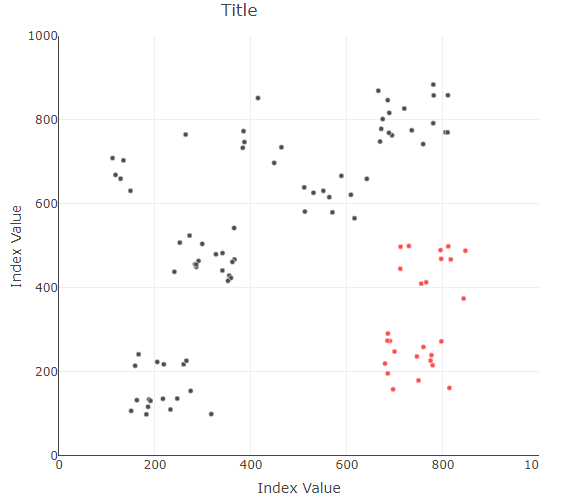

## Try to animate 
First, the toy example from https://plot.ly/python/animations/

In [30]:
figure = {'data': [{'x': [0, 1], 'y': [0, 1]}],
          'layout': {'xaxis': {'range': [0, 5], 'autorange': False},
                     'yaxis': {'range': [0, 5], 'autorange': False},
                     'title': 'Start Title',
                     'updatemenus': [{'type': 'buttons',
                                      'buttons': [{'label': 'Play',
                                                   'method': 'animate',
                                                   'args': [None]}]}]
                    },
          'frames': [{'data': [{'x': [1, 2], 'y': [1, 2]}]},
                     {'data': [{'x': [1, 4], 'y': [1, 4]}]},
                     {'data': [{'x': [3, 4], 'y': [3, 4]}],
                      'layout': {'title': 'End Title'}}]}

iplot(figure)

In [68]:
sim.configuration.flock.n_clusters = 5
print(sim.configuration.flock.n_clusters)

5


In [81]:
%%time
sim = setup_simulation(components)
pops = [sim.get_population()]
for i in range(0, 20):
    sim.step()
    pop = sim.get_population()
    pop['color'] = pop.infected.map({0:'black', 1:'red'})
    pops.append(pop)

Wall time: 4.28 s


In [82]:
def plot_boids(pop):
    return [go.Scatter(x=pop.x,
                y=pop.y,
                text=pop.infected,
                mode='markers',
                opacity=0.7,
                marker={
                    'size': 5,
                    'color': pop.color, 
                    'line': {'width': 0.5, 'color': 'white'}
                },
                name='Boids')]


frames = [{'data': plot_boids(pops[i])} for i in range(0, len(pops))]

figure = {'data': plot_boids(pop),
          'layout': {'xaxis': {'range': [0, 1000], 'autorange': False},
                     'yaxis': {'range': [0, 1000], 'autorange': False},
                     'title': 'Start Title',
                     'updatemenus': [{'type': 'buttons',
                                      'buttons': [{'label': 'Play',
                                                   'method': 'animate',
                                                   'args': [None]}]}]
                    },

            'frames': frames,
          
         }

iplot(figure)

In [75]:
import pickle

with open('sim.pkl', 'wb') as output:
    pickle.dump(sim, output)

TypeError: 'ConfigTree' object is not callable

In [79]:
import dill

with open('sim.pkl', 'wb') as output:
    dill.dump(sim, output)

TypeError: 'ConfigTree' object is not callable

In [80]:
type(sim)

vivarium.interface.interactive.InteractiveContext

In [78]:
import dill
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
        
save_object(sim, 'sim.pkl')        

TypeError: 'ConfigTree' object is not callable

In [ ]:
figure = {'data': [{'x': [0, 1], 'y': [0, 1]}],
          'layout': {'xaxis': {'range': [0, 5], 'autorange': False},
                     'yaxis': {'range': [0, 5], 'autorange': False},
                     'title': 'Start Title',
                     'updatemenus': [{'type': 'buttons',
                                      'buttons': [{'label': 'Play',
                                                   'method': 'animate',
                                                   'args': [None]}]}]
                    },
          'frames': [{'data': [{'x': [1, 2], 'y': [1, 2]}]},
                     {'data': [{'x': [1, 4], 'y': [1, 4]}]},
                     {'data': [{'x': [3, 4], 'y': [3, 4]}],
                      'layout': {'title': 'End Title'}}]}

iplot(figure)

In [14]:
go.Layout?

In [15]:
data = [
            go.Scatter(
                x=dif_similar[dif_similar['location_id'] == i]['value'],
                y=dif_similar[dif_similar['location_id'] == i]['indicator_short'],
                text=dif_similar[dif_similar['location_id'] == i]['location_name'],
                mode='markers',
                opacity=0.7,
                marker={
                    'size': 10,
                    # 'color': dif_similar[dif_similar['cluster'] == i]['color'],  # palette[i],
                    'line': {'width': 0.5, 'color': 'white'}
                },
                name=f'Location {i}'
            ) for i in pop.location_id.unique()
        ]
layout = go.Layout(
            title=f'Difference between {loc_id} and similar countries',
            xaxis={'title': 'Index Value'},
#             yaxis={'title': 'test'},
             height=1000,
            margin={'l': 120, 'b': 40, 't': 40, 'r': 0},
            # legend={'x': 0, 'y': 1},
            hovermode='closest')
fig = dict(data=data, layout=layout)

# iplot(data)
iplot(fig)

AttributeError: 'DataFrame' object has no attribute 'location_id'